Pandas version: 2.0.3
NumPy version: 1.24.4
Matplotlib version: 3.7.4
Seaborn version: 0.13.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
 14  spring      730 non-null    int64  
 15  summer      730 non-null    int64  
 16  winter      730 non-null    int64  
dtypes: float64(4), in

<Axes: >

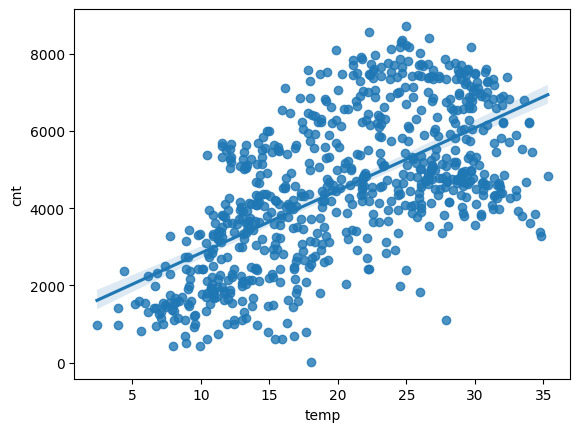

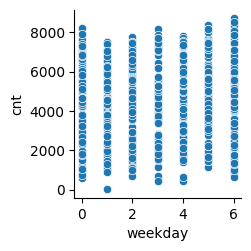

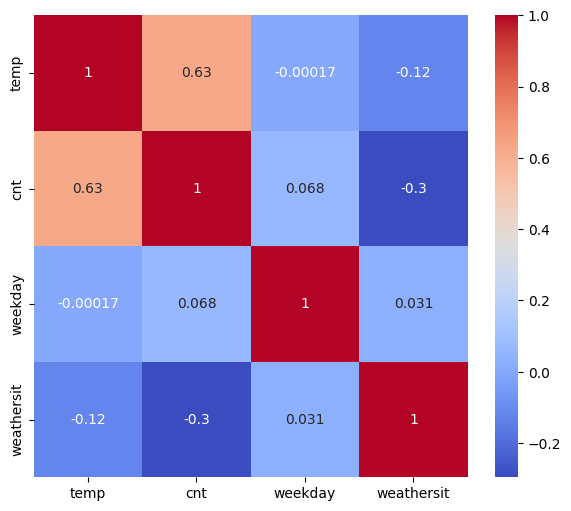

In [1120]:
# Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm


print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

#Read data from loan file
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/ML_linear_regr/day.csv',low_memory=False)

#Remove NA from the numberic column
#print(df.head())
df = df.dropna(axis=1)
df = df.drop(columns=['casual','registered'])
mapping = {1:'spring',2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(mapping)
mapping = {0:2018,1:2019}
df['yr'] = df['yr'].map(mapping)
df_dummies = pd.get_dummies(df['season'],drop_first=True).astype(int)

df = pd.concat([df, df_dummies], axis=1)
#print(df.head())

df.shape
df.info()
df.describe()
#Univariate Analysis
sns.regplot(x='temp', y='cnt', data=df)

sns.pairplot(data=df,
             x_vars =['weekday'],
             y_vars =['cnt'])
#Bivariate/mulitivariate analysis
plt.figure(figsize=(7, 6))
sns.heatmap(df[['temp','cnt','weekday','weathersit']].corr(),annot=True, cmap='coolwarm')

In [1121]:
# Data Cleaning
import sklearn
from sklearn.model_selection import train_test_split

#Create train sets [70-30]
#Train model on training data set - learning the coefficients
# Model evaluation - Training set, Test set

#Create x and y
x=(df['temp'])
y=(df['cnt'])
#Training the model
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70, random_state=100)
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,temp
576,1.0,29.246653
426,1.0,16.980847
728,1.0,10.489153
482,1.0,15.443347
111,1.0,13.803347


In [1122]:
#Fitting the model
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.46e-61
Time:                        22:05:41   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.7400    190.751      5.666      0.000     705.982    1455.498
temp         169.3134      8.899     19.026      0.000     151.830     186.797
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1123]:
#plt.plot(x_train, 1080.7400 + 169.3134 * x_train, 'r')
y_train_pred = lr_model.predict(x_train_sm)

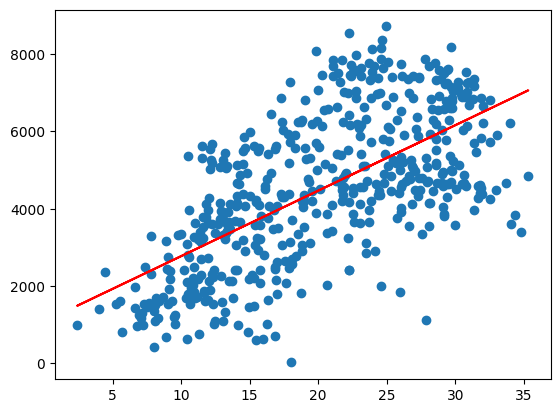

In [1124]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train_pred, 'r')
plt.show()

In [1125]:
#Residual Analysis
# f(R) = y_train, y_train_pred
res = y_train - y_train_pred
res

576    1183.409920
426     110.175167
728   -1060.694088
482     524.494510
111   -1734.831523
          ...     
578     956.518514
53     -703.018683
350    -135.048711
79    -1991.754835
520    2165.878901
Length: 510, dtype: float64

Text(0.5, 1.0, 'Residuals')

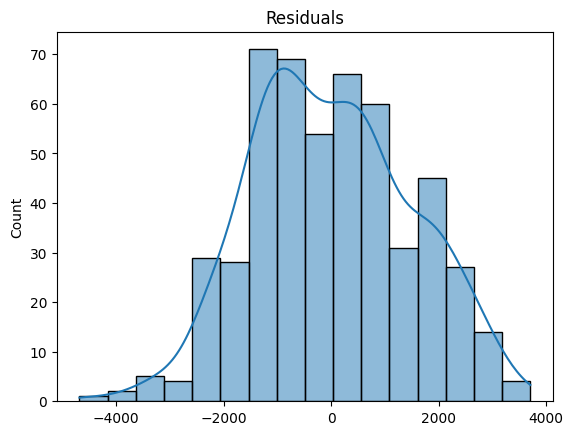

In [1126]:
#draw residuals
plt.figure()
#sns.distplot(res)
sns.histplot(res, kde=True)
plt.title("Residuals")

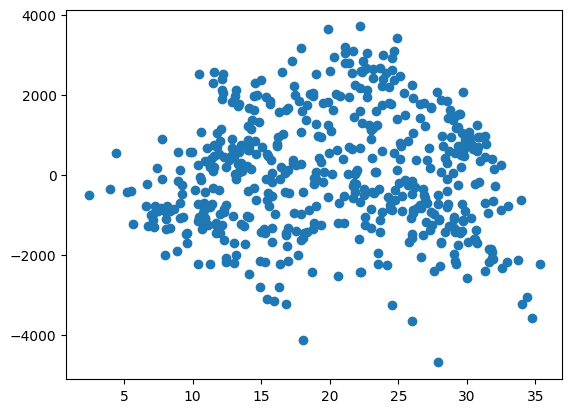

In [1127]:
#Look for patterns in residuals
plt.scatter(x_train,res)
plt.show()

In [1128]:
#Predicting and evaluating for test data set
#Make predictions on the test set (y_test_pred)
from sklearn.metrics import r2_score
x_test_sm = sm.add_constant(x_test) #Add intercept to the test
y_pred = lr_model.predict(x_test_sm)
#Evaluate mode, r-squared, on the test set)
r2=r2_score(y_true=y_test, y_pred=y_test_pred)
print("R-squared Score:", r2)

R-squared Score: 0.33356468576165654


In [1129]:
#mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

2407437.67902901

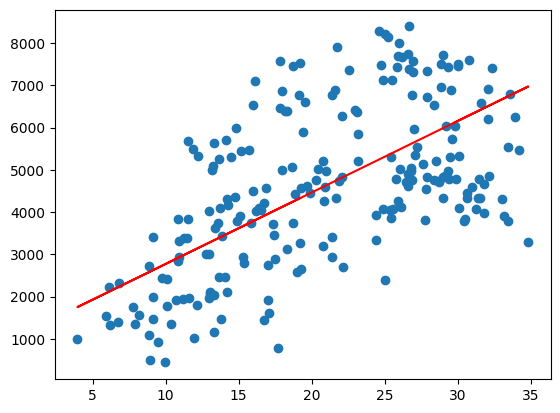

In [1130]:
# test predici
plt.scatter(x_test,y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [1131]:
from sklearn.linear_model import LinearRegression
x_train_lm = x_train.values.reshape(-1,1)
x_test_lm = x_test.values.reshape(-1,1)

In [1132]:
#SKLearn model building
#create an object of linear regression
lm = LinearRegression()
#Fit the model
lm.fit(x_train_lm,y_train)
#See the params, make predictions(train,test)
# Evaluate R2
print(lm.coef_)
print(lm.intercept_)

[169.31339421]
1080.7399911410234


In [1133]:
#Make predictions
y_train_pred = lm.predict(x_train_lm)
y_test_pred  = lm.predict(x_test_lm)

In [1134]:
#Model Evaluation
r2_y_train_pred=r2_score(y_true=y_train, y_pred=y_train_pred)
r2_y_test_pred = r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_y_train_pred)
print(r2_y_test_pred)

0.4160873499525738
0.33356468576165654


       yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0    2018     1        0        6           0           2  14.110847   
1    2018     1        0        0           0           2  14.902598   
2    2018     1        0        1           1           1   8.050924   
3    2018     1        0        2           1           1   8.200000   
4    2018     1        0        3           1           1   9.305237   
..    ...   ...      ...      ...         ...         ...        ...   
725  2019    12        0        4           1           2  10.420847   
726  2019    12        0        5           1           2  10.386653   
727  2019    12        0        6           0           2  10.386653   
728  2019    12        0        0           0           1  10.489153   
729  2019    12        0        1           1           2   8.849153   

        atemp      hum  windspeed   cnt  spring  summer  winter  
0    18.18125  80.5833  10.749882   985       1       0       0  
1  

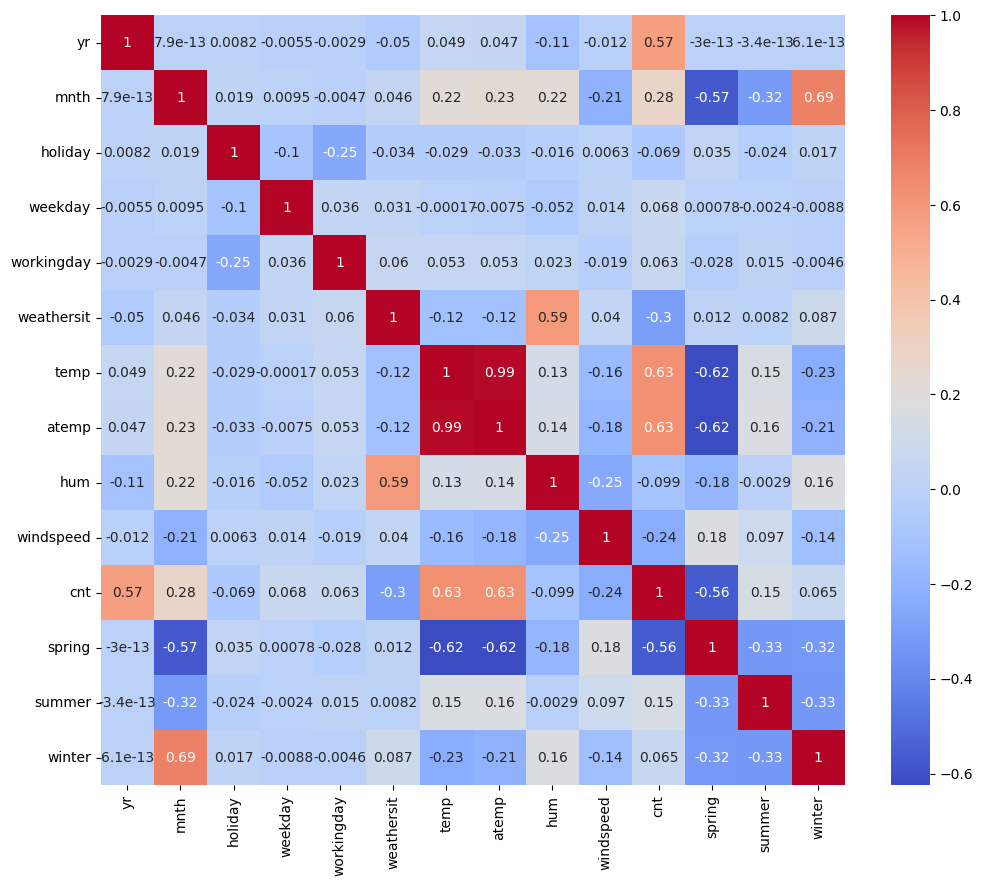

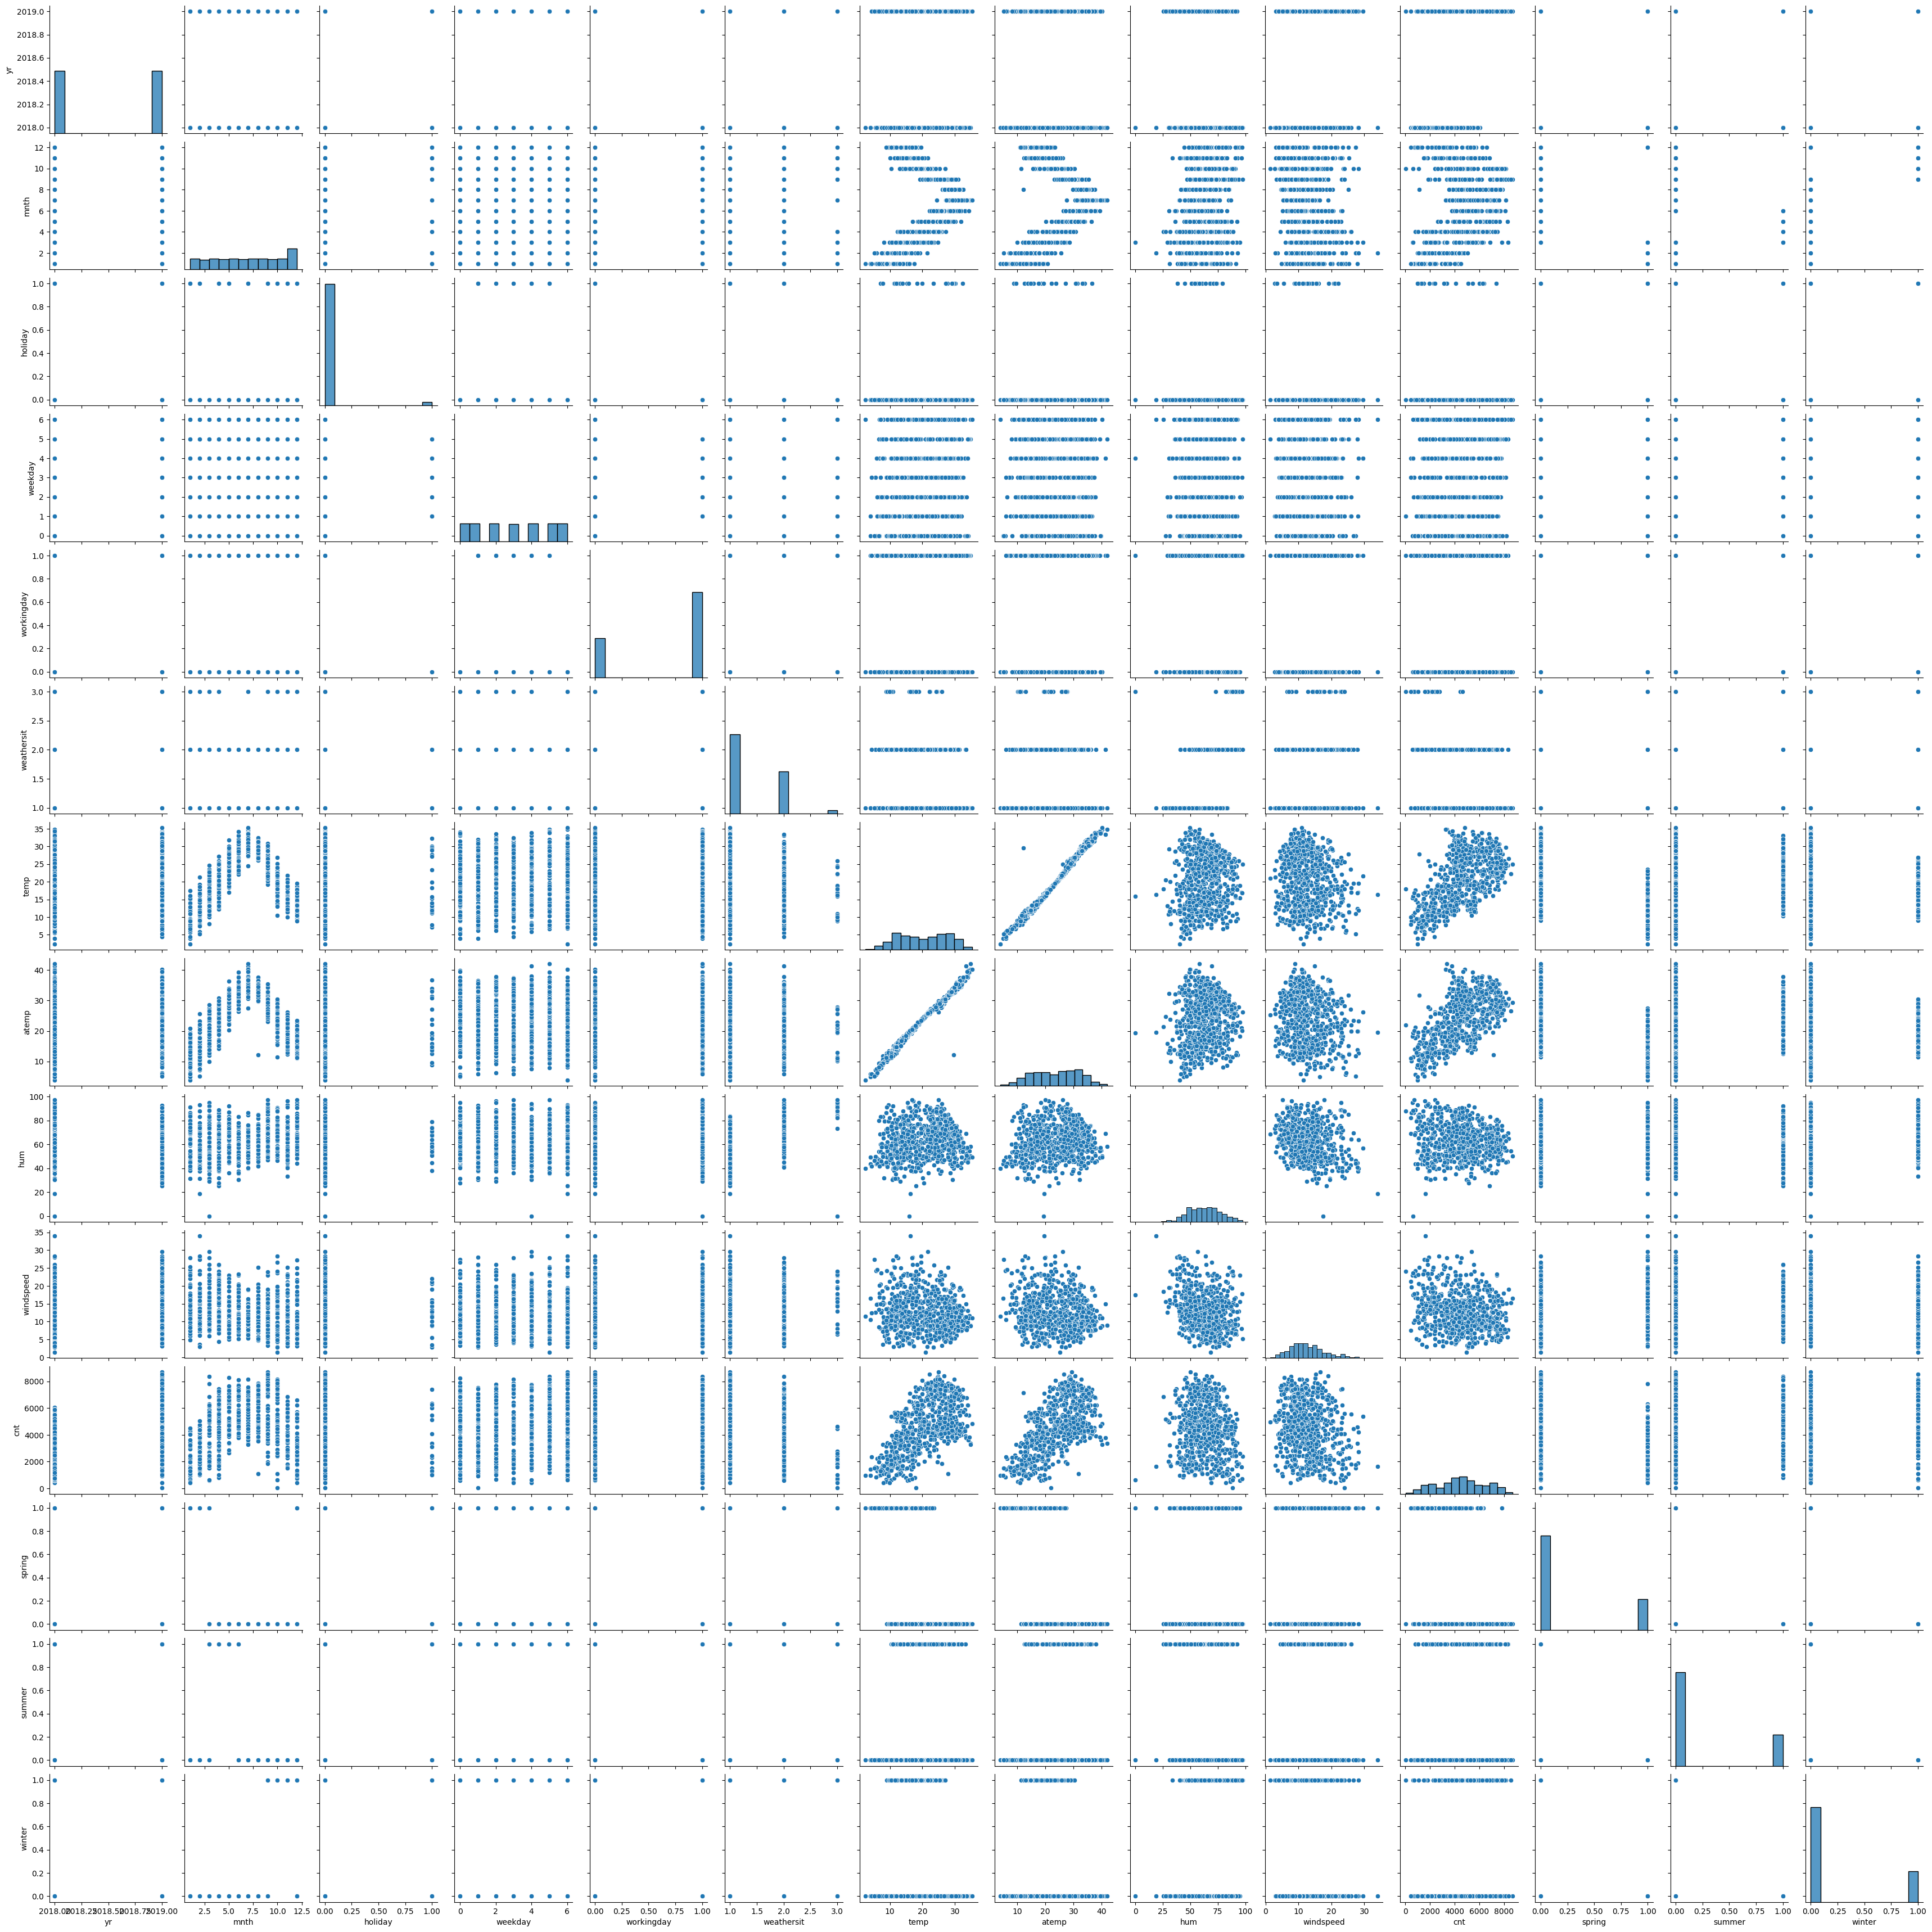

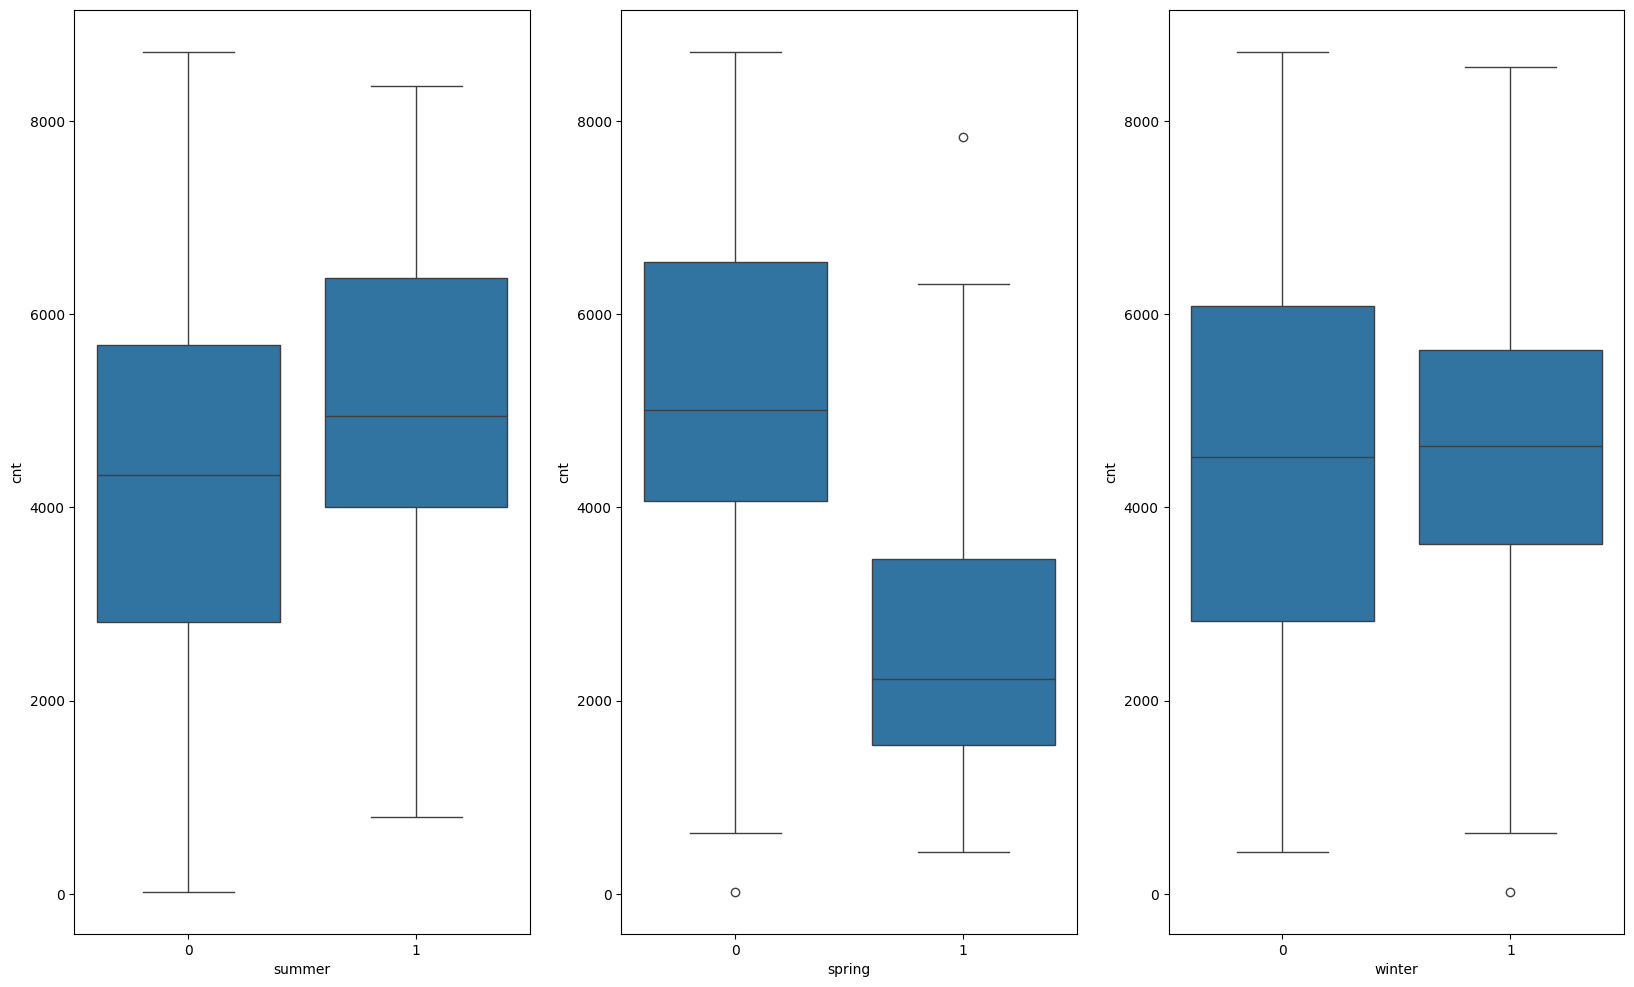

In [1135]:
#Multiple Linear regression using RFE and (p-value, VIF) 
#Data selection . Data already changed and dummies are created, and mappig already done
df1 = df[['yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt','spring','summer','winter']]
print(df1)

plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')
sns.pairplot(df1)
plt.show()

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'summer', y = 'cnt', data = df1)
plt.subplot(1,3,2)
sns.boxplot(x = 'spring', y = 'cnt', data = df1)
plt.subplot(1,3,3)
sns.boxplot(x = 'winter', y = 'cnt', data = df1)
plt.show()

In [1136]:
# Training and test data
from sklearn.model_selection import train_test_split

n=10
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_vars = ['yr','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']
df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
653,1.0,0.818182,0,0.333333,1.0,0.0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1
576,1.0,0.545455,0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0
426,1.0,0.181818,0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0
728,1.0,1.000000,0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0
482,1.0,0.272727,0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0


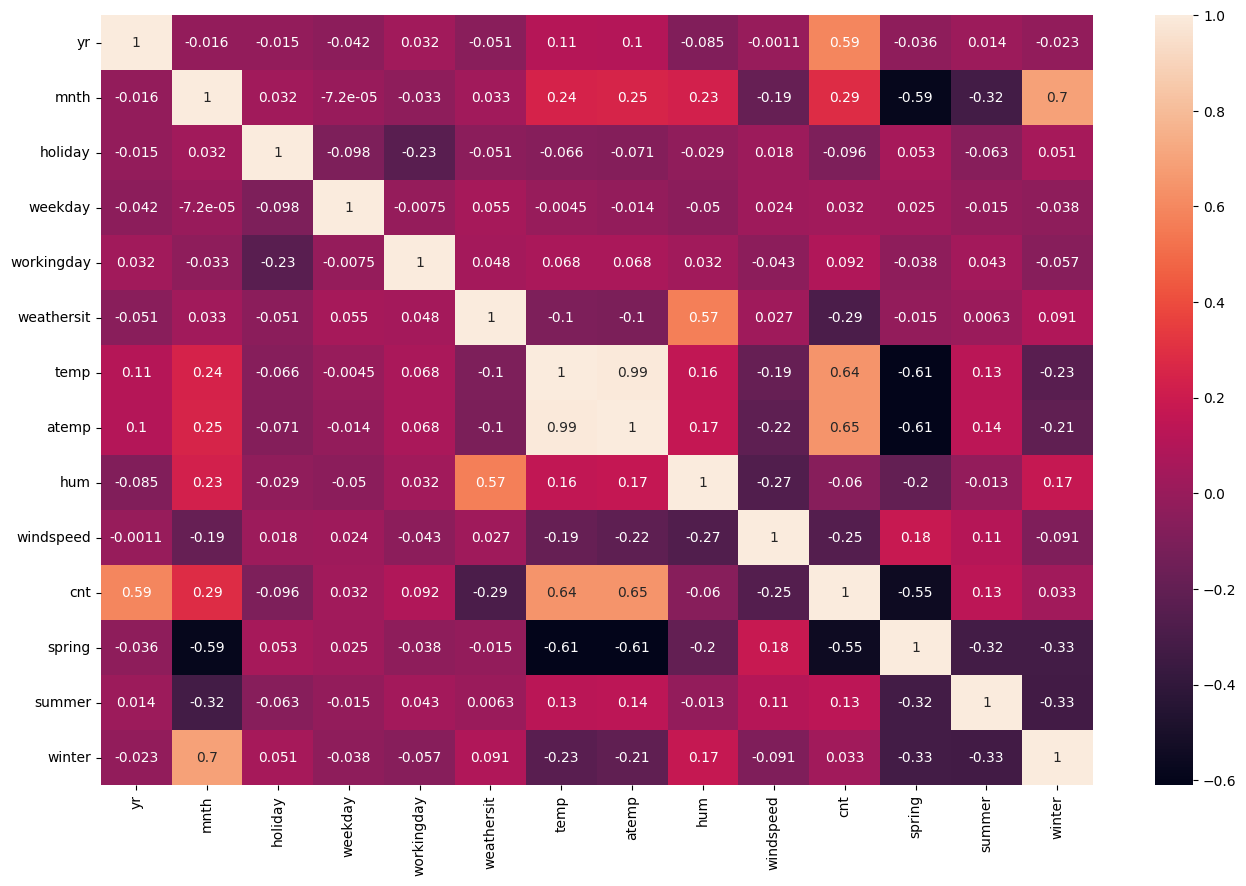

In [1138]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

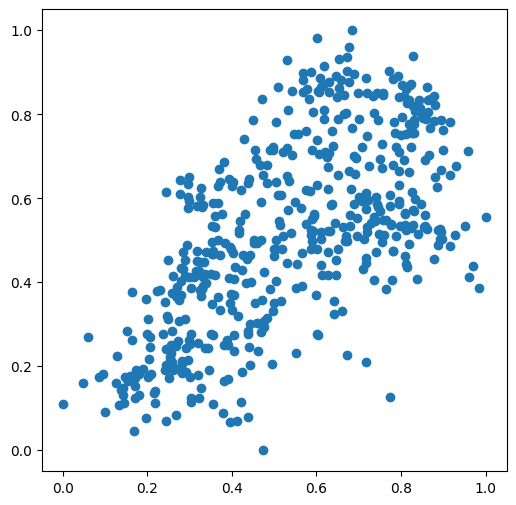

In [1139]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [1140]:
y_train = df_train.pop('cnt')
x_train = df_train

In [1141]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [1142]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [1143]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'winter'],
      dtype='object')

In [1144]:
x_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'summer'], dtype='object')

In [1145]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.02e-179
Time:                        22:06:51   Log-Likelihood:                 478.30
No. Observations:                 510   AIC:                            -934.6
Df Residuals:                     499   BIC:                            -888.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3101      0.034      9.169      0.0

In [1146]:
#atemp can be removed since it has hightest p-value among others 0.229

x_train_new = x_train_rfe.drop(['atemp'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.28e-180
Time:                        22:06:51   Log-Likelihood:                 477.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3132      0.034      9.285      0.0

In [1147]:
x_train_new.columns

Index(['const', 'yr', 'holiday', 'weekday', 'weathersit', 'temp', 'hum',
       'windspeed', 'spring', 'winter'],
      dtype='object')

In [1148]:
#const should be dropped for VIF calc

x_train_new = x_train_new.drop(['const'], axis=1)

In [1149]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() 
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,21.40
4,temp,13.32
6,windspeed,3.99
2,weekday,3.08
7,spring,2.58
3,weathersit,2.32
8,winter,2.08
0,yr,2.04
1,holiday,1.05


In [1150]:
#Residual Analysis for training model
y_train_price = lm.predict(x_train_lm) 


/tmp/ipykernel_45065/1409118921.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

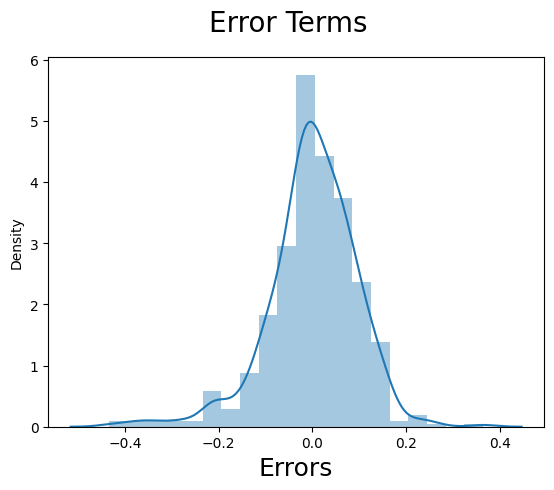

In [1151]:
#Model selection 
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1152]:
#Applying the scaling on the test sets

scaler_vars = ['yr','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']
df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])

In [1153]:
#x_train_new.head()
# #Dividing data into X_test and y_test
y_test = df_test.pop('cnt')
x_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test 
x_test_new = x_test[x_train_new.columns]
# # Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)
# Making predictions
y_pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

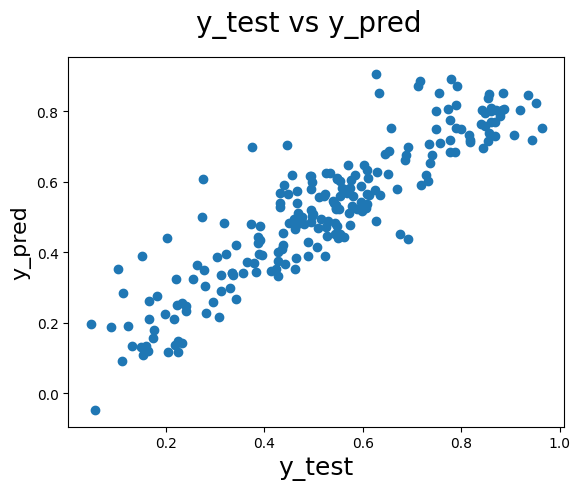

In [1154]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=18)              
plt.ylabel('y_pred', fontsize=16)              

In [1155]:
#Multiple Linear Regression
from sklearn.model_selection import train_test_split

df2 = df[['yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt','spring','summer','winter']]

n=10
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_vars = ['yr','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

df2_train[scaler_vars] = scaler.fit_transform(df2_train[scaler_vars])
df2_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
653,1.0,0.818182,0,0.333333,1.0,0.0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1
576,1.0,0.545455,0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0
426,1.0,0.181818,0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0
728,1.0,1.000000,0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0
482,1.0,0.272727,0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0


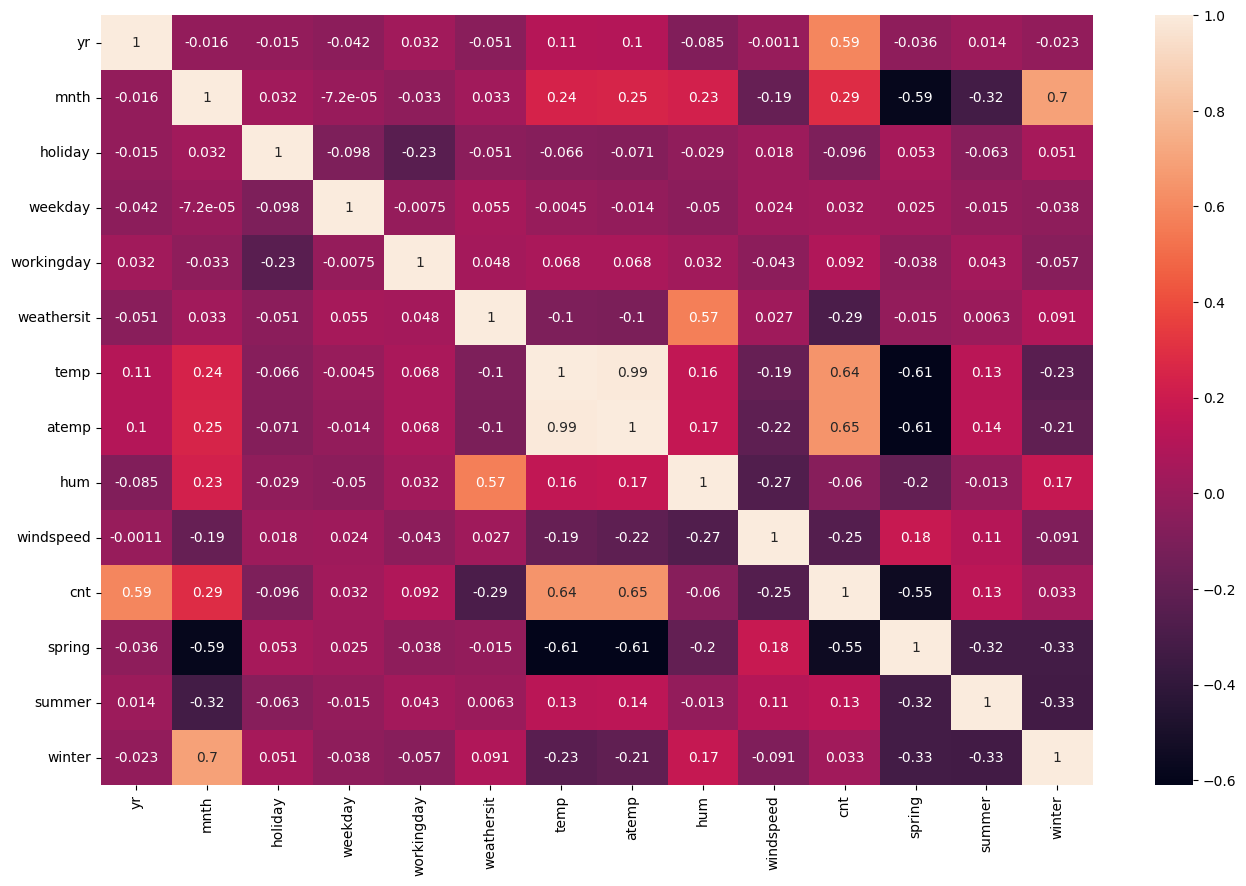

In [1157]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df2_train.corr(), annot = True, )
plt.show()

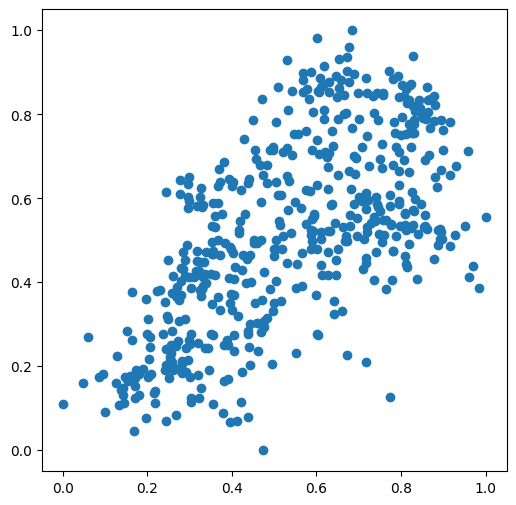

In [1158]:
plt.figure(figsize=[6,6])
plt.scatter(df2_train.temp, df2_train.cnt)
plt.show()

In [1159]:
y2_train = df2_train.pop('cnt')
x2_train = df2_train
import statsmodels.api as sm

# Add a constant
x2_train_lm = sm.add_constant(x2_train[['holiday']])

# Create a first fitted model
lr = sm.OLS(y2_train, x2_train_lm).fit()
# Check the parameters obtained

lr.params

const      0.517102
holiday   -0.136611
dtype: float64

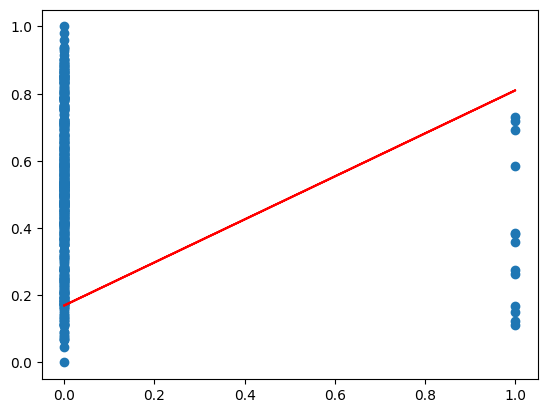

In [1160]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(x2_train_lm.iloc[:, 1], y_train)
plt.plot(x2_train_lm.iloc[:, 1], 0.169798 + 0.639952*x2_train_lm.iloc[:, 1], 'r')
plt.show()

In [1161]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.721
Date:                Wed, 13 Mar 2024   Prob (F-statistic):             0.0303
Time:                        22:06:53   Log-Likelihood:                 40.869
No. Observations:                 510   AIC:                            -77.74
Df Residuals:                     508   BIC:                            -69.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5171      0.010     51.516      0.0

In [1162]:
#Adding another variable

# Assign all the feature variables to X
x2_train_lm = x2_train[['temp', 'holiday']]

# Build a linear model

import statsmodels.api as sm
x2_train_lm = sm.add_constant(x2_train_lm)

lr = sm.OLS(y_train, x2_train_lm).fit()

lr.params

const      0.173637
temp       0.636422
holiday   -0.076223
dtype: float64

In [1163]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.01e-60
Time:                        22:06:53   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -346.2
Df Residuals:                     507   BIC:                            -333.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1736      0.020      8.769      0.0

In [1164]:
#Add third variable
x2_train_lm = x2_train[['temp', 'holiday','summer']]
import statsmodels.api as sm
x2_train_lm = sm.add_constant(x2_train_lm)
lr = sm.OLS(y_train, x2_train_lm).fit()
lr.params

const      0.170301
temp       0.630171
holiday   -0.072175
summer     0.026894
dtype: float64

In [1165]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.97e-59
Time:                        22:06:53   Log-Likelihood:                 177.23
No. Observations:                 510   AIC:                            -346.5
Df Residuals:                     506   BIC:                            -329.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1703      0.020      8.558      0.0

In [1166]:
#Adding all the variables to the model
# Check all the columns of the dataframe
df2.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter'],
      dtype='object')

In [1167]:
#Build a linear model
import statsmodels.api as sm
x2_train_lm = sm.add_constant(x2_train)

lr_1 = sm.OLS(y_train, x2_train_lm).fit()

lr_1.params

const         0.242341
yr            0.234201
mnth          0.013874
holiday      -0.062950
weekday       0.049423
workingday    0.018762
weathersit   -0.160588
temp          0.402455
atemp         0.088601
hum          -0.114793
windspeed    -0.187401
spring       -0.069112
summer        0.047951
winter        0.080500
dtype: float64

In [1168]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.40e-179
Time:                        22:06:53   Log-Likelihood:                 485.41
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     496   BIC:                            -883.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2423      0.039      6.150      0.0

In [1169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values, i) for i in range(x2_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,378.22
7,atemp,365.93
8,hum,30.05
1,mnth,12.53
9,windspeed,4.99
12,winter,4.63
10,spring,4.49
4,workingday,3.20
3,weekday,3.17
11,summer,2.71


In [1170]:
# Dropping highly correlated variables and insignificant variables
# temp is 378.22 which is high than others
x = x2_train.drop(['temp'], axis = 1)
x2_train = x2_train.drop(['temp'], axis = 1)
# Build a second fitted model
x2_train_lm = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x2_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.30e-178
Time:                        22:06:53   Log-Likelihood:                 481.28
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     497   BIC:                            -881.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.039      6.567      0.0

In [1171]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,29.77
6,atemp,16.27
1,mnth,12.50
8,windspeed,4.64
9,spring,4.23
11,winter,4.22
4,workingday,3.19
3,weekday,3.15
10,summer,2.56
5,weathersit,2.47


In [1172]:
# Remove hum featuer since it is 29.77 which is still VIF > 5
x = x2_train.drop(['hum'], axis = 1)
x2_train = x2_train.drop(['hum'], axis = 1)
# Build a third fitted model
x2_train_lm = sm.add_constant(x)

lr_3 = sm.OLS(y_train, x2_train_lm).fit()
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.71e-178
Time:                        22:06:53   Log-Likelihood:                 477.18
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     498   BIC:                            -879.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2022      0.034      5.904      0.0

In [1173]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,11.27
6,atemp,9.01
7,windspeed,4.57
10,winter,3.78
4,workingday,3.16
3,weekday,3.15
8,spring,2.31
0,yr,2.06
9,summer,1.99
5,weathersit,1.56


In [1174]:
#Dropping the variable and updating the model
#mnth's p-value : 0.791 
x = x2_train.drop(['mnth'], axis = 1)
x2_train = x2_train.drop(['mnth'], axis = 1)

# Build a fourth fitted model
x2_train_lm = sm.add_constant(x)

lr_4 = sm.OLS(y_train, x2_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.14e-179
Time:                        22:06:53   Log-Likelihood:                 477.14
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     499   BIC:                            -885.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2061      0.031      6.663      0.0

In [1175]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,5.14
6,windspeed,4.49
3,workingday,3.15
2,weekday,3.08
7,spring,2.20
0,yr,2.06
8,summer,1.83
9,winter,1.73
4,weathersit,1.56
1,holiday,1.09


/tmp/ipykernel_45065/567990660.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y2_train - y2_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

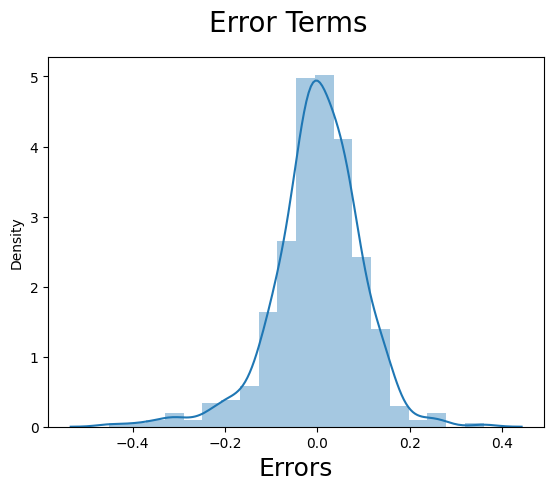

In [1176]:
#Residual Analysis of the train data

y2_train_cnt = lr_4.predict(x2_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y2_train - y2_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

In [1177]:
#Making Predictions Using the Final Model

df2_test[scaler_vars] = scaler.transform(df2_test[scaler_vars])
df2_test.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000


In [1178]:
#Dividing into X_test and y_test
from sklearn.metrics import r2_score

#drop varaiables for the test data as we did it for trained data
df2_test = df2_test.drop(["temp", "hum", "mnth"], axis = 1)

y2_test = df2_test.pop('cnt')
x2_test = df2_test
# Adding constant variable to test dataframe
x2_test_m4 = sm.add_constant(x2_test)
# Making predictions using the fourth model
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

y_pred_m4 = lr_4.predict(x2_test_m4)

Text(0, 0.5, 'y_pred')

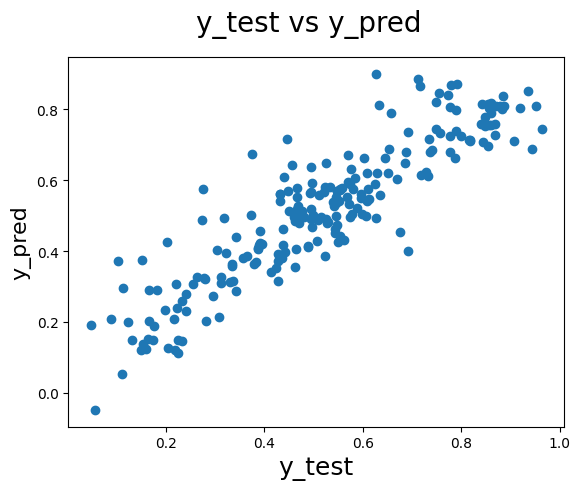

In [1179]:
#Model Evaluation
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1180]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.14e-179
Time:                        22:06:54   Log-Likelihood:                 477.14
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     499   BIC:                            -885.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2061      0.031      6.663      0.0

In [1181]:
from sklearn.metrics import r2_score
#R2 score
r2=r2_score(y_true=y2_test, y_pred=y_pred_m4)
print("R-squared Score:", r2)

#Adjusted R2
n = len(y2_test)
k = x2_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared Score:", adj_r2)

R-squared Score: 0.8028880108770096
Adjusted R-squared Score: 0.7934114729384043


In [1182]:
#Equation arrived finally for the best fitted line

#cnt = 0.2061 + 0.2378 * yr -0.0596 * holiday + 0.0193 * weekday + 0.0193 * workingday -0.1965 * weathersit 
#             + 0.4640 * atemp -0.1498 * windspeed -0.0989 * spring + 0.0282 * summer + 0.0582 * winter 